In [0]:
%tensorflow_version 2.x

In [0]:
#1. keras -> tensorflow.keras
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train),(x_test, y_test))
(x_train, y_train),(x_test, y_test) = load_data()

In [31]:
#(6萬筆資料, 28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
import pandas as pd
pd.DataFrame(x_train[59998])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,192,230,27,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,152,252,193,27,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,129,252,190,9,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,252,210,14,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,216,199,66,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,11,43,254,222,62,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,143,252,222,16,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,169,246,208,17,0,0,0,0,0,0,0,0,0,0,0,0


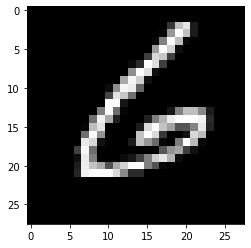

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[59998], cmap="gray")

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dense(10,activation="softmax"))
mlp.summary()
# Param = input * input + output 
# 100480 = 784*128+128(bias)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 最後一層個數
# 1:"binary_crossentropy" 2up:"categorical_crossentropy"
# 激活函數
# 1:"sigmoid" 2up:"softmax"
mlp.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
# mlp: 進去要1D，tensorflow: 輸入[-1, 1][0, 1]
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾次
# validation_sqlit: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有  1:最多  2:適中)
# 270: 54000(train) / 200
mlp.fit(x_train_norm, 
        y_train_cat, 
        batch_size=200,
        epochs=20,
        validation_split=0.1,
        verbose=2)

Epoch 1/20
270/270 - 1s - loss: 0.4468 - accuracy: 0.8791 - val_loss: 0.2020 - val_accuracy: 0.9443
Epoch 2/20
270/270 - 1s - loss: 0.2054 - accuracy: 0.9422 - val_loss: 0.1471 - val_accuracy: 0.9600
Epoch 3/20
270/270 - 1s - loss: 0.1506 - accuracy: 0.9575 - val_loss: 0.1195 - val_accuracy: 0.9655
Epoch 4/20
270/270 - 1s - loss: 0.1174 - accuracy: 0.9667 - val_loss: 0.1021 - val_accuracy: 0.9715
Epoch 5/20
270/270 - 1s - loss: 0.0962 - accuracy: 0.9729 - val_loss: 0.0933 - val_accuracy: 0.9730
Epoch 6/20
270/270 - 1s - loss: 0.0799 - accuracy: 0.9775 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 7/20
270/270 - 1s - loss: 0.0683 - accuracy: 0.9811 - val_loss: 0.0855 - val_accuracy: 0.9743
Epoch 8/20
270/270 - 1s - loss: 0.0582 - accuracy: 0.9837 - val_loss: 0.0806 - val_accuracy: 0.9770
Epoch 9/20
270/270 - 1s - loss: 0.0506 - accuracy: 0.9860 - val_loss: 0.0780 - val_accuracy: 0.9755
Epoch 10/20
270/270 - 1s - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.0771 - val_accuracy: 0.9777

In [40]:
# predict: 機率  predict_classes: 類別
pre = mlp.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [41]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9772


[0.07560152560472488, 0.9771999716758728]

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
c=["{}(預測)".format(i) for i in range(10)]
i=["{}(正確)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.990,0.000,0.001,0.000,0.001,0.000,0.004,0.001,0.003,0.000
1(正確),0.000,0.988,0.004,0.001,0.000,0.001,0.002,0.000,0.005,0.000
2(正確),0.002,0.000,0.974,0.005,0.001,0.000,0.003,0.005,0.011,0.000
3(正確),0.000,0.000,0.005,0.974,0.000,0.004,0.000,0.005,0.005,0.007
4(正確),0.001,0.000,0.001,0.001,0.975,0.000,0.006,0.002,0.003,0.011
5(正確),0.002,0.000,0.000,0.011,0.002,0.966,0.008,0.001,0.006,0.003
6(正確),0.006,0.002,0.002,0.001,0.004,0.002,0.980,0.000,0.002,0.000
7(正確),0.001,0.005,0.009,0.004,0.002,0.000,0.000,0.973,0.001,0.006
8(正確),0.006,0.000,0.003,0.004,0.004,0.003,0.001,0.002,0.973,0.003
9(正確),0.001,0.003,0.000,0.003,0.006,0.002,0.001,0.003,0.004,0.977


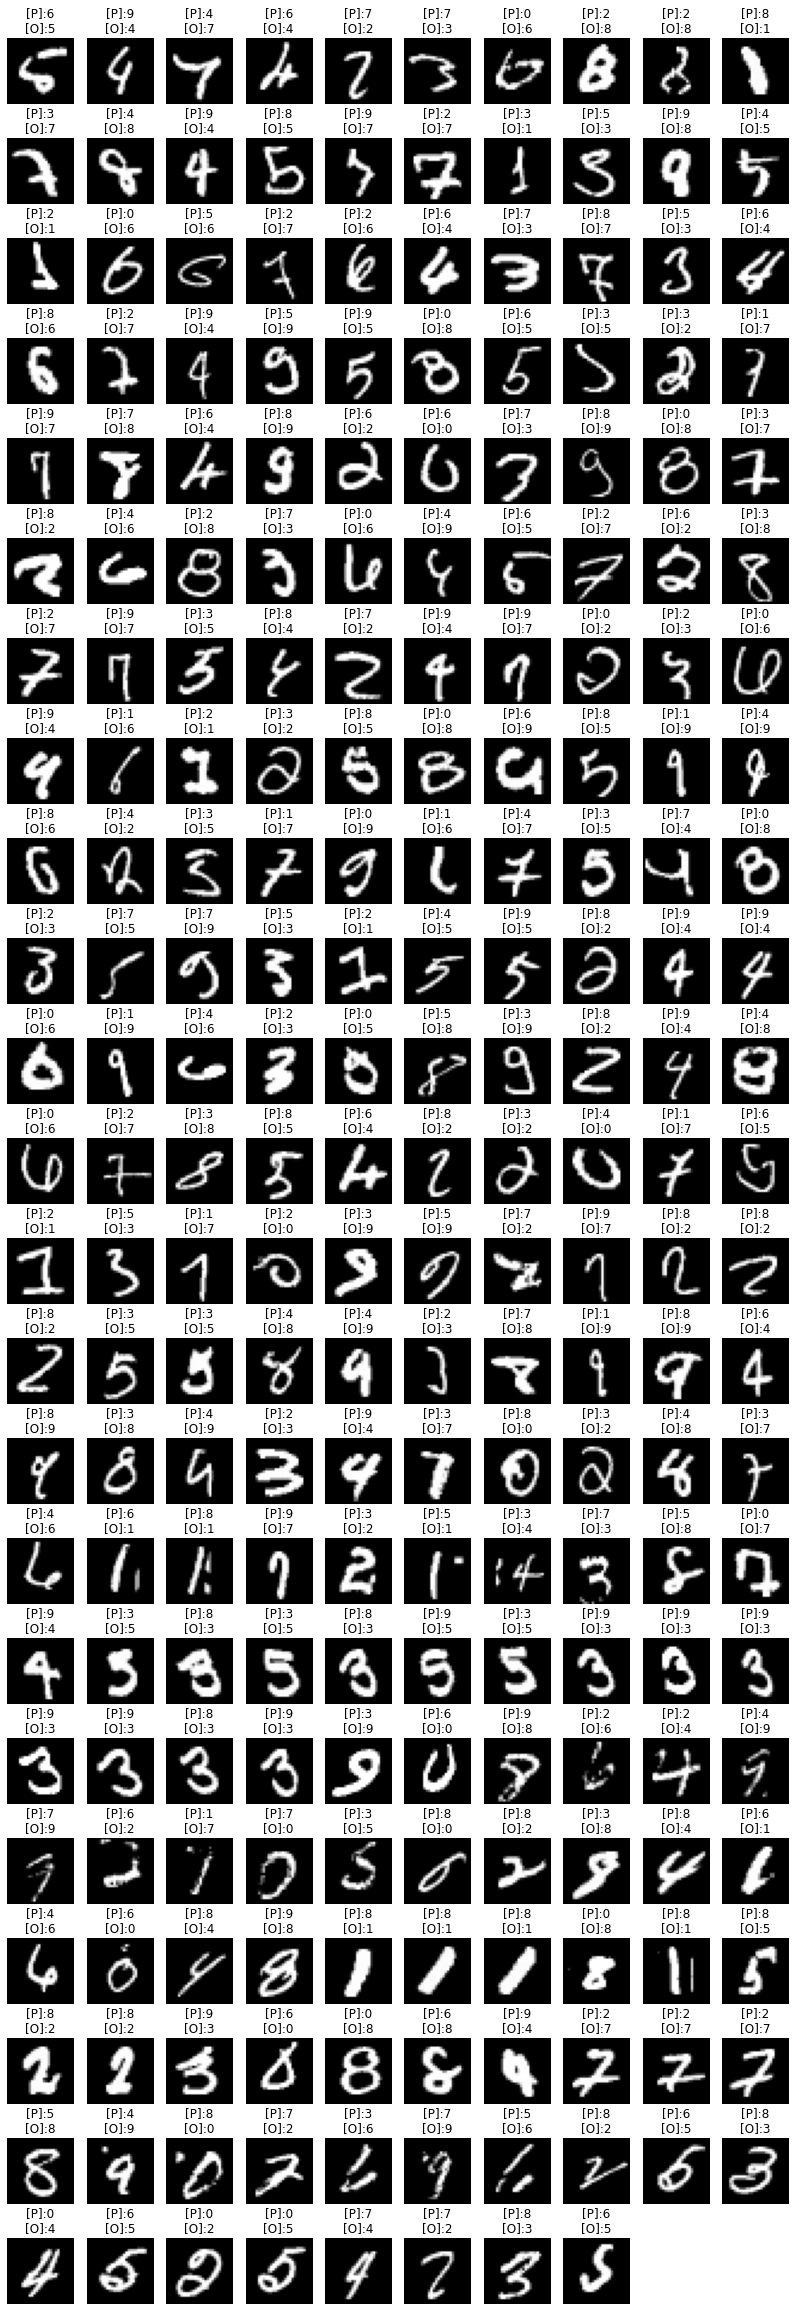

In [54]:
idx = np.nonzero(pre != y_test)[0]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i , img in enumerate(false_pre_img):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[O]:{}".format(false_pre_predict[i],
                              false_pre_label[i]
                              )
  plt.title(t)
  plt.axis("off")
  plt.imshow(img, cmap="gray")

檔名test.png
正確答案應該是: 6


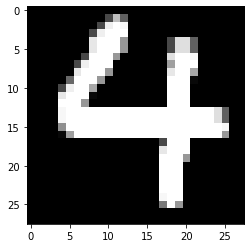

In [56]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("正確答案應該是:", answer)
plt.imshow(img_raw, cmap="gray")